In [25]:
import matplotlib.pyplot as plt
from utils import Logger
from pathlib import Path
import numpy as np

In [40]:
recent_logfn = []

In [41]:
for fn in Path('.').iterdir():
    if fn.suffix == '.pkl':
        recent_logfn.append(fn)

In [42]:
i = 0

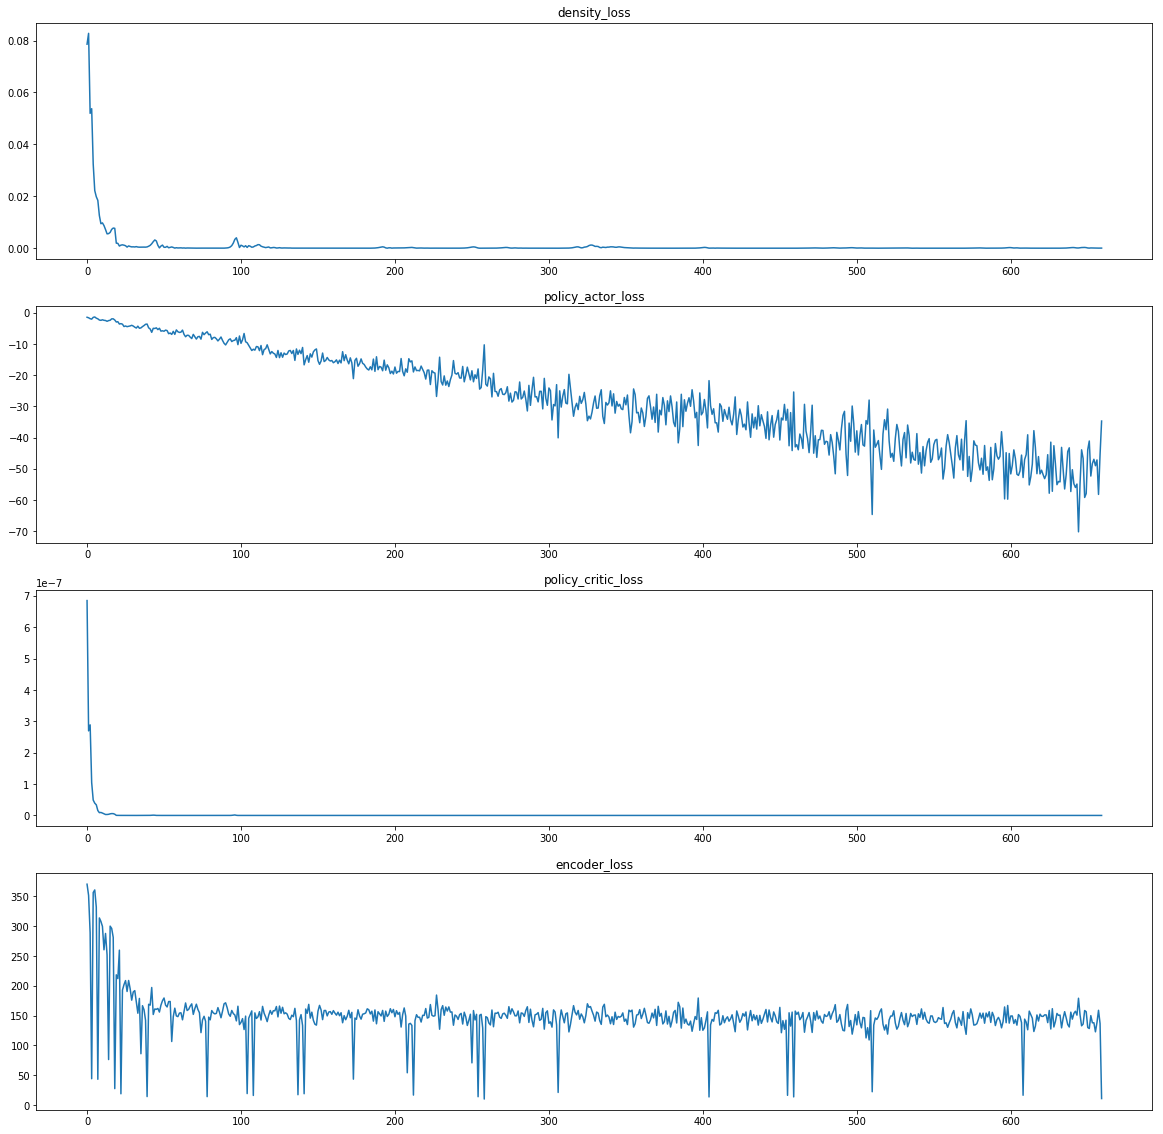

In [43]:
lgr = Logger(max_size=10000)
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(20)

titles = ['density_loss', 'policy_actor_loss', 'policy_critic_loss', 'encoder_loss']
fn = recent_logfn[i]
lgr.import_logs(str(fn))
logs = [lgr.logs['density']['loss'], 
        lgr.logs['policy']['actor_loss'], 
        lgr.logs['policy']['critic_loss'], 
        lgr.logs['encoder']['loss']]
for title, log, ax in zip(titles, logs, axs):
    if title == 'encoder_loss': log = [np.sum(l) for l in log]
    ax.plot(log)
    ax.set_title(title)
plt.show()